In [1]:
#We load the libraries
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('data/train.csv', header=0)

In [3]:
#We get informations about the different features we have and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
instant       10886 non-null int64
dteday        10886 non-null object
season        10886 non-null int64
yr            10886 non-null int64
mnth          10886 non-null int64
hr            10886 non-null int64
holiday       10886 non-null int64
weekday       10886 non-null int64
workingday    10886 non-null int64
weathersit    10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
hum           10886 non-null float64
windspeed     10886 non-null float64
cnt           10886 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 1.2+ MB


In [4]:
#We have 15 different features and 10 886 rows 
#We also know their is no information missing in one of the 10886 rows which is a good news. 
#We display the five first line to have a look into the datas
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [5]:
#Let's grab some informations about our features
print "We have %d different seasons" % len(df['season'].unique())
print df['season'].unique()
print "The features yr, holiday and working day are booleans"
print df['yr'].unique()
print df['holiday'].unique()
print df['workingday'].unique()
print "Weathersit has %d different values" % len(df['weathersit'].unique())
print df['weathersit'].unique()


We have 4 different seasons
[1 2 3 4]
The features yr, holiday and working day are booleans
[0 1]
[0 1]
[0 1]
Weathersit has 4 different values
[1 2 3 4]


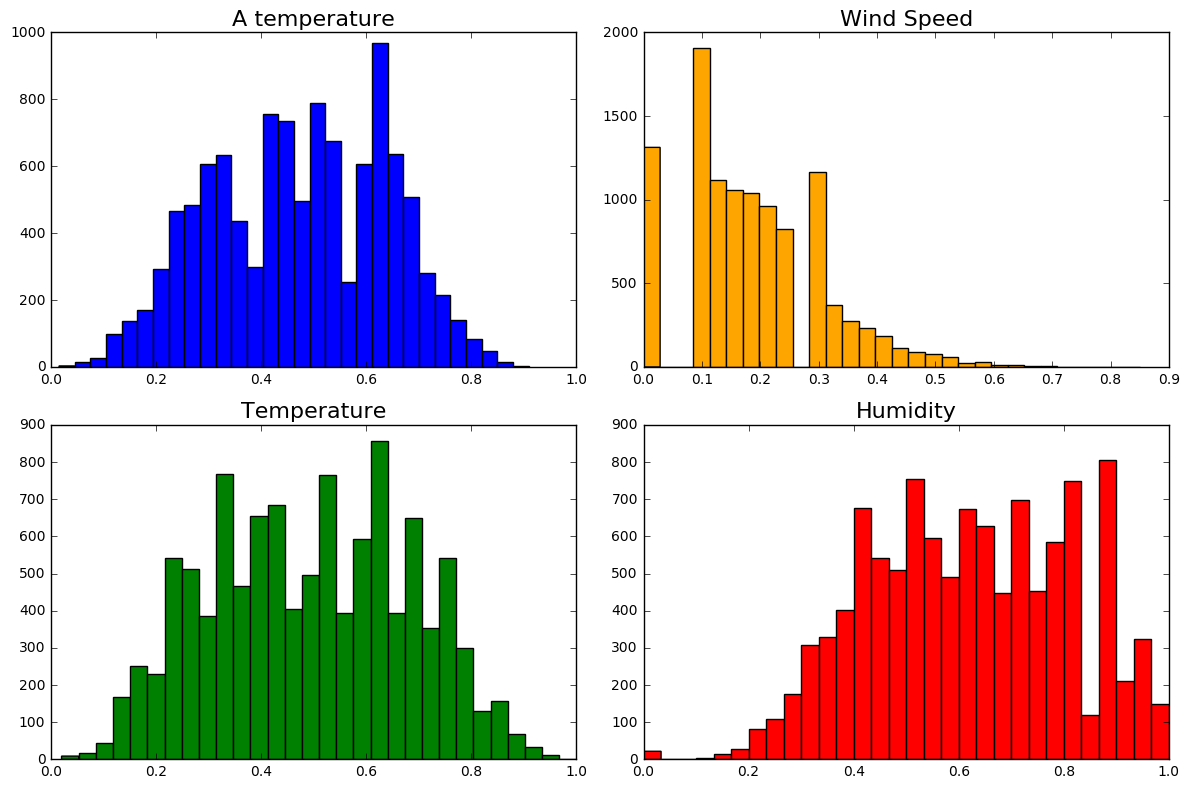

In [6]:
fig = plt.figure(figsize=(12, 8)) # (width, height)

fig.add_subplot(221) # 2 x 2 grid, 1st subplot
h = plt.hist(df['atemp'], bins=30, color='blue')
plt.title('A temperature', fontsize=16)

fig.add_subplot(222) # 2 x 2 grid, 2nd subplot
h = plt.hist(df['windspeed'], bins=30, color='orange')
plt.title('Wind Speed', fontsize=16)

fig.add_subplot(223) # 2 x 2 grid, 3rd subplot
h = plt.hist(df['temp'], bins=30, color='green')
plt.title('Temperature', fontsize=16)

fig.add_subplot(224) # 2 x 2 grid, 4th subplot
h = plt.hist(df['hum'], bins=30, color='red')
plt.title('Humidity', fontsize=16)

plt.tight_layout() # improve spacing between subplots

Apparently no need for scaling or normalization but maybe for Wind Speed ?

In [12]:
def cross_validate(design_matrix, labels, classifier, cv_folds):
    """ Perform a cross-validation and returns the predictions.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  sklearn classifier object
        Classifier instance; must have the following methods:
        - fit(X, y) to train the classifier on the data X, y
        - predict_proba(X) to apply the trained classifier to the data X and return probability estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape)
    for tr, te in cv_folds:
        classifier.fit(design_matrix[tr],labels[tr])
        y_pred = classifier.predict(design_matrix[te])
        pred[te] = y_pred
    return pred

In [ ]:
labels = df.axes[1]
y = df['cnt']
X = df[['temp','hum','atemp','windspeed','season','mnth','holiday','weekday']].values
# Set up a stratified 10-fold cross-validation
from sklearn import cross_validation
folds = cross_validation.StratifiedKFold(y, 5, shuffle=True)
print folds

In [13]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e6) 
ypred_logreg = cross_validate(X, y, clf, folds)

Accuracy: 0.018


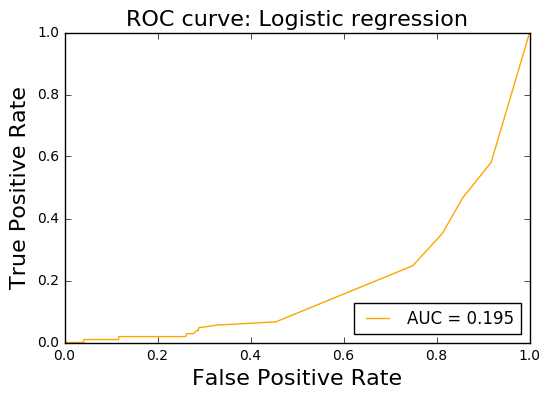

In [14]:
from sklearn import metrics

fpr_logreg, tpr_logreg, thresholds = metrics.roc_curve(y, ypred_logreg, pos_label=1)
print "Accuracy: %.3f" % metrics.accuracy_score(y, ypred_logreg)
auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)

plt.plot(fpr_logreg, tpr_logreg, '-', color='orange', label='AUC = %0.3f' % auc_logreg)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve: Logistic regression', fontsize=16)
plt.legend(loc="lower right")